In [223]:
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import datetime
import glob
from matplotlib.colors import Normalize

import cv2


def set_axis(x, no_labels = 7)->tuple[np.array, np.array]:
    """Sets the x-axis positions and labels for a plot.

    Args:
        x (np.array): The x-axis data.
        no_labels (int, optional): The number of labels to display. Defaults to 7.

    Returns:
        tuple[np.array, np.array]: A tuple containing:
            - The positions of the labels on the x-axis.
            - The labels themselves.
    """
    nx = x.shape[0]
    step_x = int(nx / (no_labels - 1))
    x_positions = np.arange(0,nx,step_x)
    x_labels = x[::step_x]
    return x_positions, x_labels


In [224]:
path_out = 'mateusz\\'
files = glob.glob(path_out+"*")
files.sort()


In [225]:
dx= 5.106500953873407 
dt= 0.0016


data = []
first_filename = files[0]
for file in files[:6]:
   data.append(np.load(file))
data = np.concatenate(data)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data), freq=f'{dt}s')


columns = np.arange(len(data[0])) * dx


df = pd.DataFrame(data=data, index=index, columns=columns)


In [226]:
# This is an example transformation and should be converted to the proper algorithm
df -= df.mean()
df = np.abs(df)
low, high = np.percentile(df, [3, 99])
norm = Normalize(vmin=low, vmax=high, clip=True)

cols = df.columns
idx = df.index

# This function can show the plot with any array input
def show_figure(table, norm=norm):
    df = table
    if type(table) != pd.core.frame.DataFrame:
        df = pd.DataFrame(df, columns=cols, index=idx)

    fig = plt.figure(figsize=(12,16))
    ax = plt.axes()

    if norm is not None:
        im = ax.imshow(df,interpolation='none', aspect='auto', norm=norm)
    else:
        im = ax.imshow(df,interpolation='none', aspect='auto')
    
    plt.ylabel('time')
    plt.xlabel('space [m]')

    cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(im, cax=cax)
    x_positions, x_labels = set_axis(df.columns)
    ax.set_xticks(x_positions, np.round(x_labels))
    y_positions, y_labels = set_axis(df.index.time)
    ax.set_yticks(y_positions, y_labels)
    plt.show()

In [227]:
arr = np.array(df)
# show_figure(arr)

In [228]:
# def median_blur_rectangular(image, kernel_size):
#     """
#     Apply median blur with a rectangular kernel.
    
#     :param image: Input image (grayscale or color).
#     :param kernel_size: Tuple specifying the kernel size (height, width).
#     :return: Image after applying median blur.
#     """
#     k_height, k_width = kernel_size

#     # Pad the image to handle border pixels
#     pad_height = k_height // 2
#     pad_width = k_width // 2
#     padded_image = cv2.copyMakeBorder(image, pad_height, pad_height, pad_width, pad_width, cv2.BORDER_REFLECT)

#     # Create an empty output image
#     output = np.zeros_like(image)

#     # Sliding window over the image
#     for y in range(image.shape[0]):
#         for x in range(image.shape[1]):
#             # Extract the neighborhood (rectangular region)
#             region = padded_image[y:y + k_height, x:x + k_width]
            
#             # Compute the median and assign it to the central pixel
#             if len(image.shape) == 3:  # Color image
#                 for c in range(image.shape[2]):  # Process each channel
#                     output[y, x, c] = np.median(region[:, :, c])
#             else:  # Grayscale image
#                 output[y, x] = np.median(region)
    
#     return output

# kernel_size = (50, 5)
# blurred_image = median_blur_rectangular(arr, kernel_size)
# # show_figure(blurred_image)

In [229]:
kernel_size = (51, 5)
kernel = np.ones((kernel_size[0],kernel_size[1])) / (kernel_size[0]*kernel_size[1])
arr_blurred = cv2.filter2D(arr, kernel=kernel, ddepth=-1)

# show_figure(arr_blurred)

kernel_size = (11, 3)
kernel = np.ones((kernel_size[0],kernel_size[1])) / (kernel_size[0]*kernel_size[1])
arr_blurred2 = cv2.filter2D(arr_blurred, kernel=kernel, ddepth=-1)

# show_figure(arr_blurred2)

In [230]:
sobel_x = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
img_sobel_x = cv2.filter2D(arr_blurred, -1, sobel_x)
img_sobel_y = cv2.filter2D(arr_blurred, -1, sobel_y)
img_sobel = np.hypot(img_sobel_x, img_sobel_y)

# show_figure(img_sobel_x)
# show_figure(img_sobel_y)
# show_figure(img_sobel)

In [231]:
kernel_size = (1001, 5)
kernel = np.ones((kernel_size[0],kernel_size[1])) / (kernel_size[0]*kernel_size[1])
sobel_blurred = cv2.filter2D(img_sobel_x, kernel=kernel, ddepth=-1)

# show_figure(sobel_blurred)

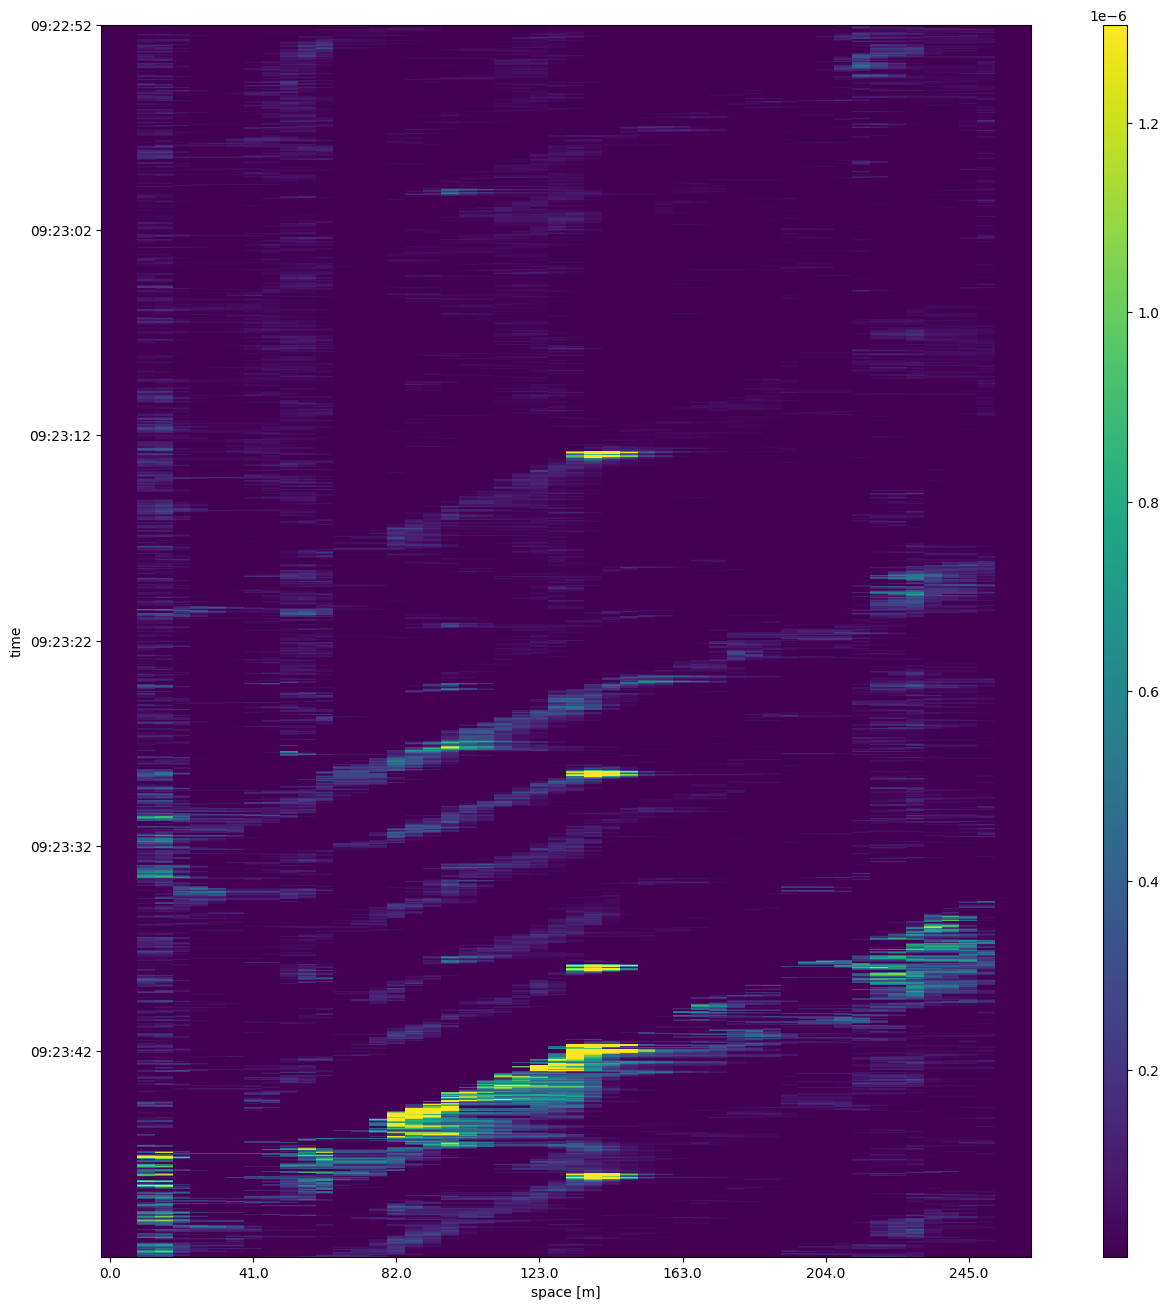

In [232]:
struct = np.ones((3, 3), np.uint8)
arr_erode = cv2.erode(img_sobel_x, struct, iterations=1)

show_figure(arr_erode)

erode_sobel_x = cv2.filter2D(sobel_blurred, -1, sobel_x)
# show_figure(-erode_sobel_x)

In [233]:
laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
img_lapl = cv2.filter2D(arr_blurred2, -1, laplacian)

# show_figure(img_lapl * 5)

In [1]:
dst = cv2.Canny(np.uint8(arr), 50, 100, apertureSize=3, L2gradient=False)
show_figure(dst)

NameError: name 'cv2' is not defined